In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "1FluMaster.csv"
df = pd.read_csv(file_path, header=0)  # Skipping the first row if it's a duplicate header


/var/folders/cg/72yw7y6n4wxb3jgxj33txbt40000gn/T/ipykernel_56700/3770644932.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_geo, x="Total infected", y="State", palette="coolwarm")


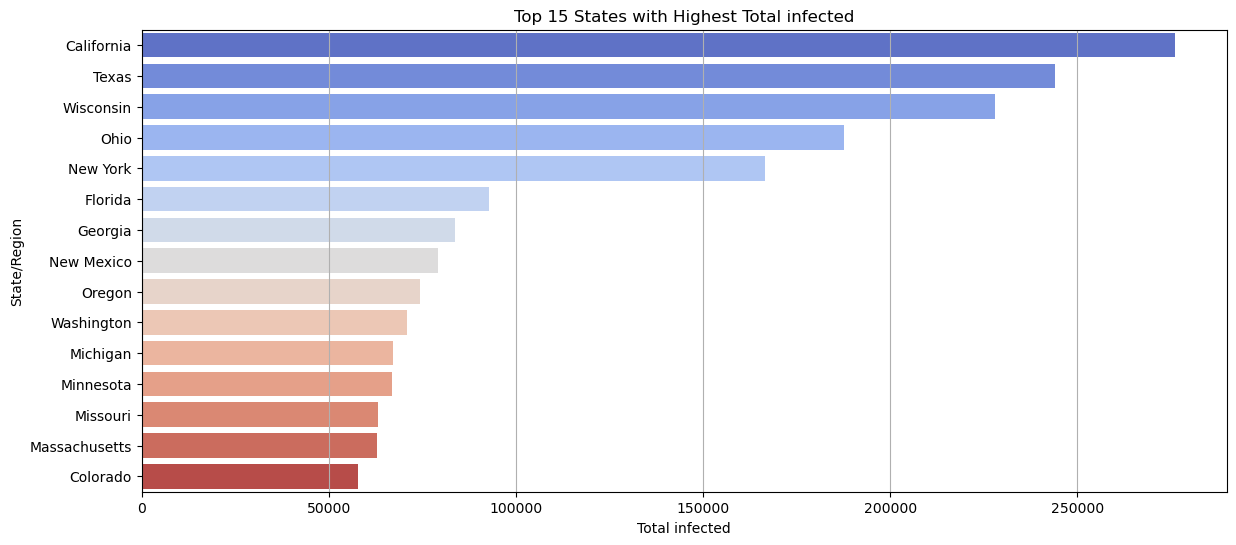

In [10]:
 #Replace 'X' with NaN and convert Total A + Total B	 to numeric
df = df.replace('X', pd.NA)
df["Total infected"] = df["Total A"] + df["Total B"]

 #Aggregate ILITOTAL cases by region (state)
df_geo = df.groupby("State")["Total infected"].sum().reset_index()

 #Sort the states by total cases for better visualization (Top 15)
df_geo = df_geo.sort_values(by="Total infected", ascending=False).head(15)

 #Plot the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_geo, x="Total infected", y="State", palette="coolwarm")

plt.title("Top 15 States with Highest Total infected")
plt.xlabel("Total infected")
plt.ylabel("State/Region")
plt.grid(axis="x")

 #Show the plot
plt.show()



/var/folders/cg/72yw7y6n4wxb3jgxj33txbt40000gn/T/ipykernel_56700/1133408135.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="State")


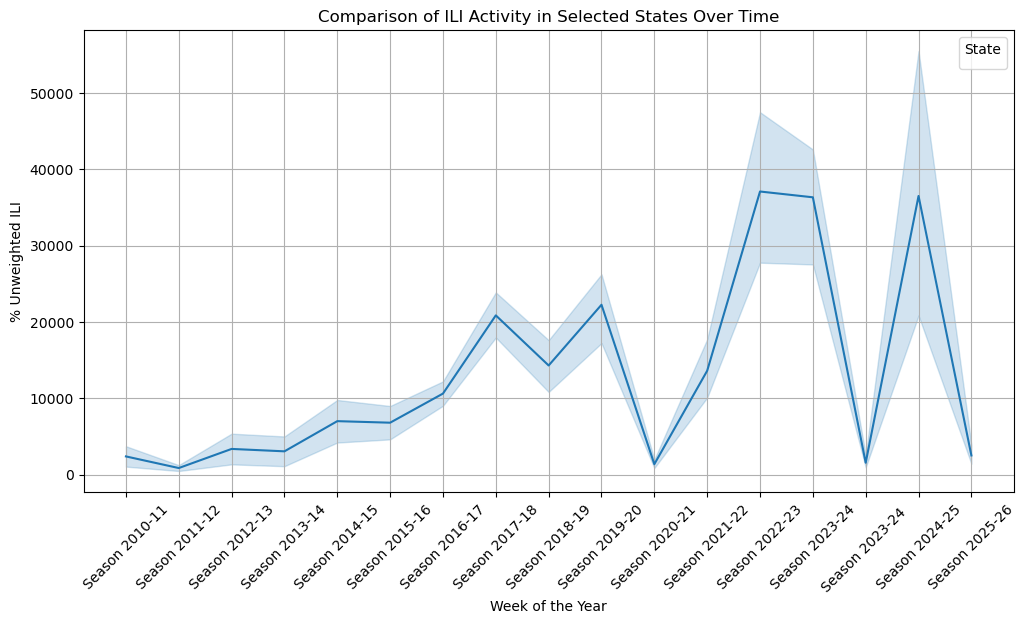

In [11]:
# Plot multiple line charts for different states
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="Season", y="Total infected")
plt.xticks (rotation = 45)

plt.title("Comparison of ILI Activity in Selected States Over Time")
plt.xlabel("Week of the Year")
plt.ylabel("% Unweighted ILI")
plt.legend(title="State")
plt.grid(True)

plt.show()

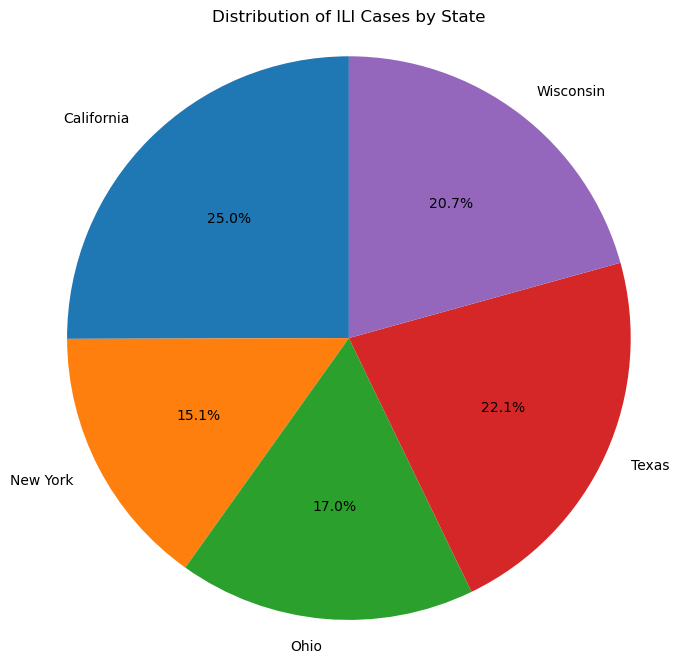

In [12]:
# Group the data by state and sum the 'Total infected' values
region_ili = df_filtered.groupby("State")["Total infected"].sum().reset_index()
selected_states = ["California", "Texas", "Wisconsin", "Ohio", "New York"]  
df_filtered = df[df["State"].isin(selected_states)]


# Create a pie chart using matplotlib
plt.figure(figsize=(8, 8))
plt.pie(region_ili["Total infected"], labels=region_ili["State"], autopct='%1.1f%%', startangle=90)
plt.title("Distribution of ILI Cases by State")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()